#### Multivariate analysis - sleep dataset
Robert Gosz

First of all I will import the dataset. I have seen that we have no column names in a 'sleep75.xls' file, so i have to name them first and i expoerted the column names from description file

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('sleep75.xls', header=None)


columns = [
    "age", "black", "case", "clerical", "construc", "educ", "earns74", "gdhlth",
    "inlf", "leis1", "leis2", "leis3", "smsa", "lhrwage", "lothinc", "male",
    "marr", "prot", "rlxall", "selfe", "sleep", "slpnaps", "south", "spsepay",
    "spwrk75", "totwrk", "union", "worknrm", "workscnd", "exper", "yngkid", "yrsmarr",
    "hrwage", "agesq"
]
df.columns=columns
df.head()
df


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.53,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.75,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,.,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,.,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,.,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,.,2916


In [3]:
complete_cases = df.dropna().shape[0]
percentage_complete = (complete_cases / df.shape[0]) * 100

print(f"Number of complete cases: {complete_cases}")
print(f"Percentage of complete cases: {percentage_complete:.2f}%")

Number of complete cases: 706
Percentage of complete cases: 100.00%


In [4]:
df.dtypes

age           int64
black         int64
case          int64
clerical    float64
construc    float64
educ          int64
earns74       int64
gdhlth        int64
inlf          int64
leis1         int64
leis2         int64
leis3         int64
smsa          int64
lhrwage      object
lothinc     float64
male          int64
marr          int64
prot          int64
rlxall        int64
selfe         int64
sleep         int64
slpnaps       int64
south         int64
spsepay       int64
spwrk75       int64
totwrk        int64
union         int64
worknrm       int64
workscnd      int64
exper         int64
yngkid        int64
yrsmarr       int64
hrwage       object
agesq         int64
dtype: object

I checked in data wrangler extenstion that the issue that columns: 'lhrwage' and 'hrwage' are objects was that some of values was representated as a '.' so I will replace them with the mode.

In [5]:
df['lhrwage'] = df['lhrwage'].replace('.', np.nan)
df['lhrwage'] = pd.to_numeric(df['lhrwage'], errors='coerce')
df['lhrwage'] = df['lhrwage'].fillna(0)
df['hrwage'] = df['hrwage'].replace('.', np.nan)
df['hrwage'] = pd.to_numeric(df['hrwage'], errors='coerce')
df['hrwage'] = df['hrwage'].fillna(0)
print(df.dtypes)

age           int64
black         int64
case          int64
clerical    float64
construc    float64
educ          int64
earns74       int64
gdhlth        int64
inlf          int64
leis1         int64
leis2         int64
leis3         int64
smsa          int64
lhrwage     float64
lothinc     float64
male          int64
marr          int64
prot          int64
rlxall        int64
selfe         int64
sleep         int64
slpnaps       int64
south         int64
spsepay       int64
spwrk75       int64
totwrk        int64
union         int64
worknrm       int64
workscnd      int64
exper         int64
yngkid        int64
yrsmarr       int64
hrwage      float64
agesq         int64
dtype: object


C:\Users\robert\AppData\Local\Temp\ipykernel_25424\1783030979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['lhrwage'] = df['lhrwage'].replace('.', np.nan)
C:\Users\robert\AppData\Local\Temp\ipykernel_25424\1783030979.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hrwage'] = df['hrwage'].replace('.', np.nan)


TO DO:
MODEL SLEEP VS LHRWAGE
 
MODEL Z 5 NAJLEPOSZYMI
POTEM POROWNAC WYKRESIKI I WYCIAGNAC WNIOSKI

Buliding Simple Model just to measure the real 

In [6]:
import statsmodels.api as sm

df_working = df[df['hrwage'] != 0]
X = df_working[['hrwage']]
X = sm.add_constant(X)
y = df_working['sleep']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.299
Date:                Sun, 01 Jun 2025   Prob (F-statistic):              0.255
Time:                        20:10:35   Log-Likelihood:                -3980.9
No. Observations:                 532   AIC:                             7966.
Df Residuals:                     530   BIC:                             7974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3288.7081     31.735    103.630      0.0

####  Results Summary:
- **Coefficient on `hrwage`**: `-5.75`  
  → Suggests that each additional unit increase in hourly wage is associated with **approximately 5.75 fewer minutes of sleep per day**, on average.

- **P-value**: `0.255`  
  → The coefficient is **not statistically significant** at conventional levels (p > 0.05).

- **R-squared**: `0.002`  
  → The model explains only **0.2% of the variation** in sleep duration.

- **Model Fit**:  
  Low explanatory power, indicating that `hrwage` alone is a poor predictor of sleep time.

####  Interpretation:

The baseline model shows a weak and statistically insignificant negative relationship between hourly wage and sleep time. This implies that higher wages **may** be associated with slightly less sleep, but the effect is not reliable or meaningful in isolation.

To improve the model, i will perform  Forward stepwise selection controling the columns which may bias (and is high corellation beetween) the most my model

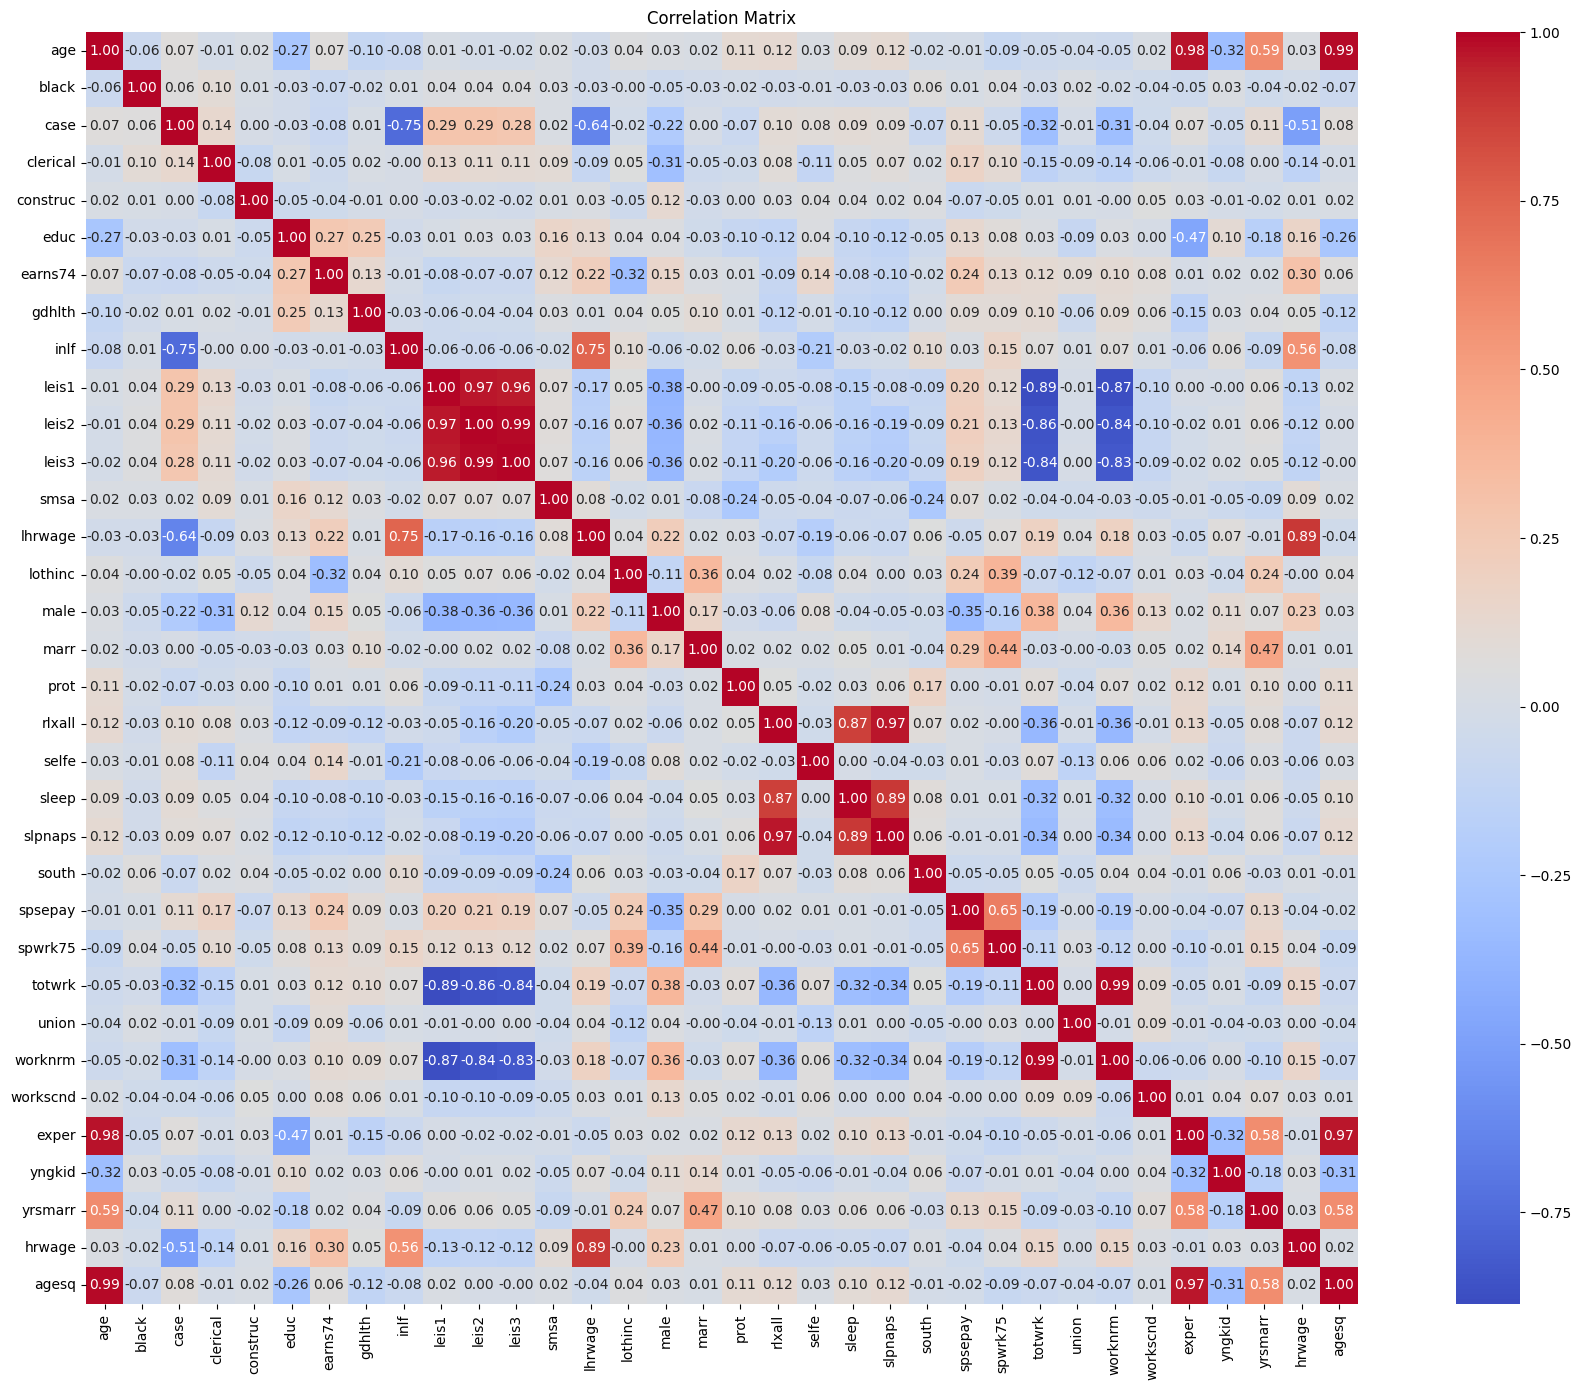

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 14))
corr_matrix = df.corr()  # Compute pairwise correlations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Selection of Explanatory Variables

Based on the work by Biddle and Hamermesh (*"Sleep and the Allocation of Time"*) and standard economic reasoning, I selected the following variables for inclusion in the regression model explaining weekly sleep time:

- **agesq**: to account for the nonlinear effect of age,
- **educ**: years of education, as a proxy for human capital,
- **hrwage**: hourly wage (only available for those who work),
- **inlf**: in labor force indicator,
- **totwrk**: total work time per week,
- **marr**: marital status,
- **yngkid**: presence of young children,
- **union**, **selfe**: employment characteristics,
- **gdhlth**: general health status,
- **south**, **smsa**, **black**: regional and demographic controls.



In [10]:
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

features = [
    'agesq', 'educ', 'hrwage', 'inlf', 'totwrk', 'marr',
    'yngkid', 'union', 'selfe', 'gdhlth', 'south', 'smsa', 'black'
]
df_working = df[df['totwrk'] != 0]

X = df_working[features]
y = df_working['sleep']

lr = LinearRegression()

# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(
    lr,
    n_features_to_select='auto',
    direction='forward',
    cv=5
)
sfs_forward.fit(X, y)

selected_columns = X.columns[sfs_forward.get_support()].tolist()
print("Selected features (forward):", selected_columns)

# Budujemy model OLS na wybranych cechach
X_selected = sm.add_constant(X[selected_columns])
model_selected = sm.OLS(y, X_selected).fit()

# Podsumowanie nowego modelu
print(model_selected.summary())




Selected features (forward): ['agesq', 'educ', 'totwrk', 'gdhlth', 'south', 'smsa']
                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           5.01e-17
Time:                        20:13:45   Log-Likelihood:                -5029.3
No. Observations:                 676   AIC:                         1.007e+04
Df Residuals:                     669   BIC:                         1.010e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

#### 1. Overall Model Quality

| Statistic               | Value         | Interpretation                                           |
|-------------------------|---------------|----------------------------------------------------------|
| **R-squared**           | 0.124         | The model explains 12.4% of the variance in `sleep`      |
| **Adjusted R-squared**  | 0.116         | Adjusted for the number of predictors                    |
| **F-statistic**         | 15.81         | The model is statistically significant overall           |
| **Prob (F-statistic)**  | < 0.0001      | Strong evidence that at least one predictor matters      |



#### 2. Regression Coefficients

| Variable    | Coefficient | p-value | Significant? | Interpretation                                                                 |
|-------------|-------------|---------|--------------|--------------------------------------------------------------------------------|
| **const**   | 3725.13     | 0.000   |  Yes        | A person with baseline values sleeps ~3725 min/week (~8h53m/day)              |
| **agesq**   | +0.029      | 0.100   |  No         | Slight positive effect of age squared – not statistically significant         |
| **educ**    | -6.40       | 0.300   |  No         | Each additional year of education → ~6 min less sleep (not significant)       |
| **totwrk**  | -0.163      | 0.000   |  Yes        | Each extra minute of work → 0.16 minute less sleep                            |
| **gdhlth**  | -74.43      | 0.167   |  No         | Good health reduces sleep by ~74 min/week – not statistically significant     |
| **south**   | +84.68      | 0.044   |  Yes        | People in the South sleep ~85 minutes more per week                           |
| **smsa**    | -53.01      | 0.119   |  No         | Living in a city reduces sleep by ~53 minutes – not statistically significant |



  **`totwrk`** is the most impactful variable – more work means less sleep.
-  **`south`** also significantly increases sleep duration.
-  Other predictors (`educ`, `gdhlth`, `smsa`, `agesq`) are not statistically significant.
-  R-squared is relatively low — many other factors affecting sleep are not captured.

# DIAGNOSTIC PLOTS FOR BOTH MODELS

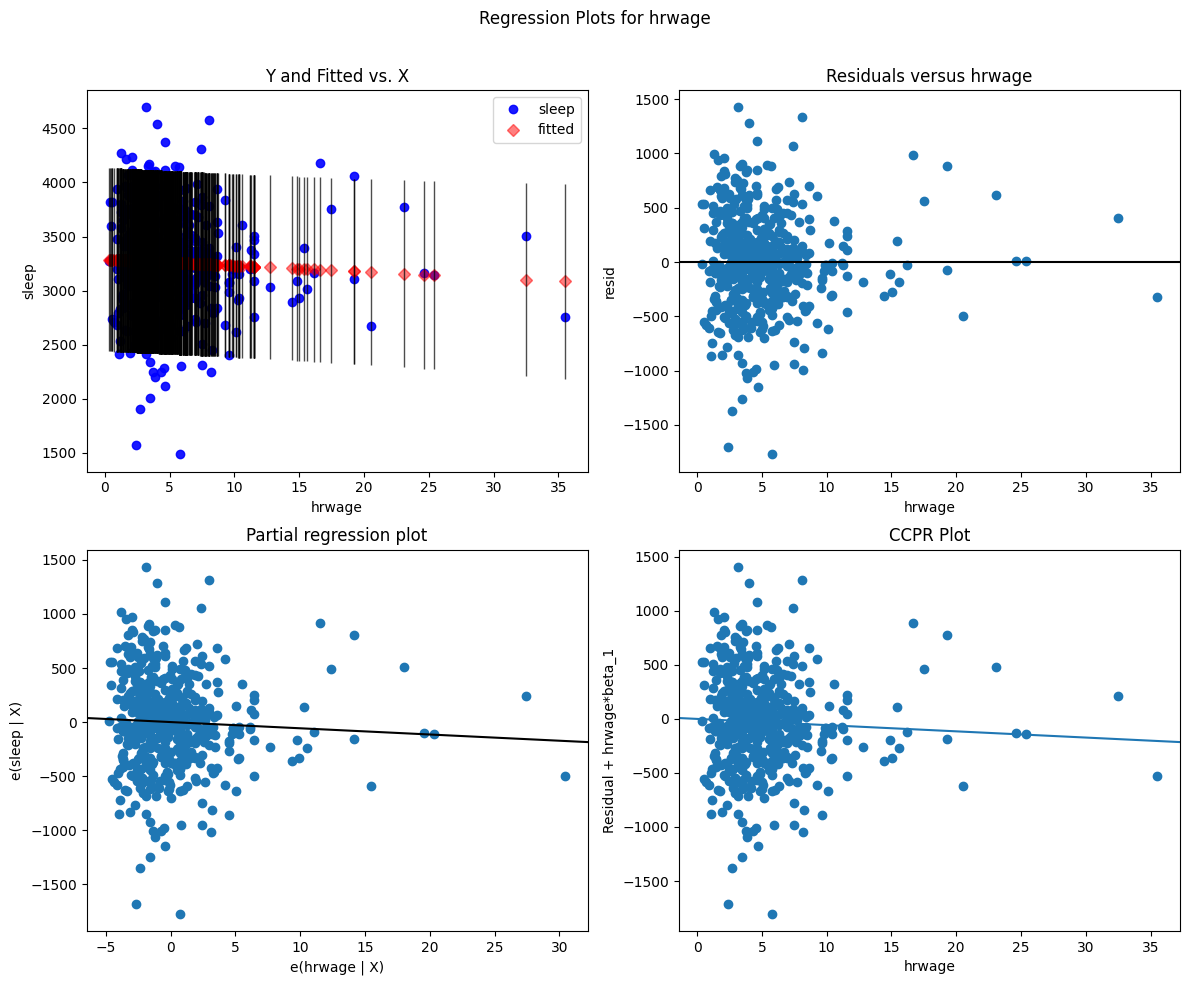

In [ ]:

fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(model, 'hrwage', fig=fig)
plt.show()

## Diagnostic Plot Interpretation for `hrwage` (Hourly Wage)

### 1. Y and Fitted vs. X
- Displays actual vs. fitted values of `sleep` by `hrwage`.
- Fitted values (red) are mostly flat, indicating a weak relationship.
- Vertical lines represent residuals — many are large, suggesting poor fit.

### 2. Residuals vs. hrwage
- Shows residuals plotted against `hrwage`.
- No clear pattern in residuals — randomness supports homoscedasticity.
- Data are heavily concentrated at lower `hrwage` values.

### 3. Partial Regression Plot
- Examines the unique effect of `hrwage` on `sleep` after controlling for other variables.
- Very weak (slightly negative) linear relationship.

### 4. CCPR Plot
- Cumulative effect of `hrwage` on `sleep`, including residuals.
- The trend line is nearly flat or slightly decreasing.
- Again, most data points are clustered at low wage levels.

### **Conclusion**
There is little to no meaningful linear relationship between hourly wage and sleep duration. The effect of `hrwage` on `sleep` appears minimal after accounting for other factors.

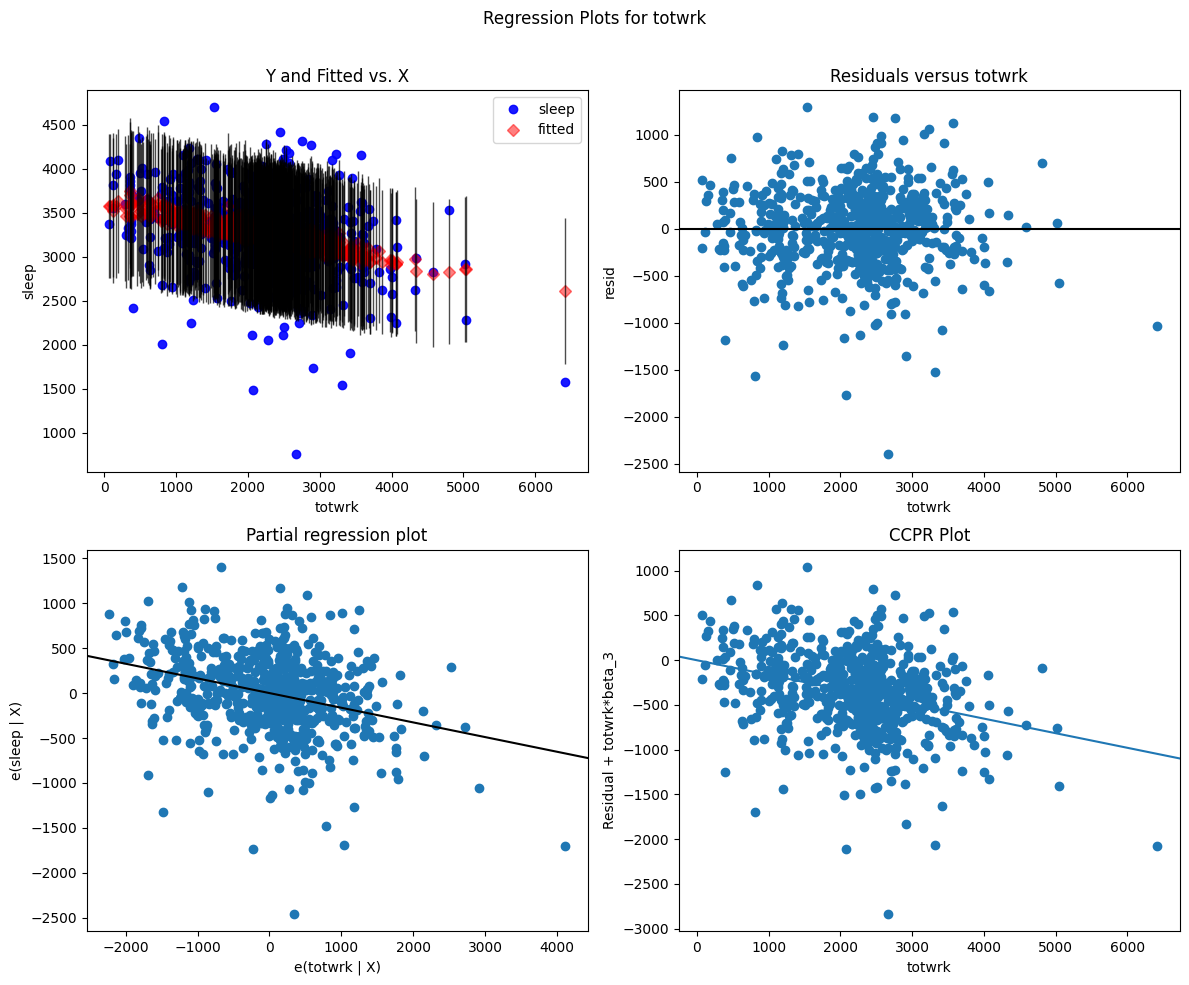

In [17]:
fig2 = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(model_selected, 'totwrk', fig=fig2)
plt.show()

## Diagnostic Plot Interpretation for `totwrk` (Total Work Time)

### 1. Y and Fitted vs. X 
-  Plots actual sleep values (`sleep`) vs. total work time (`totwrk`), along with the fitted values from the regression model.
-  The fitted values (red diamonds) form a clear downward trend, indicating that as work hours increase, predicted sleep decreases.
-  There is a visible **negative relationship** between work time and sleep duration.


### 2. Residuals vs. totwrk 
-  Residuals are randomly scattered with no strong pattern, although slightly denser around the center.
-  This supports the **assumption of homoscedasticity** (constant variance of residuals) and no obvious model misspecification with respect to `totwrk`.



### 3. Partial Regression Plot 
-  Strong negative linear trend.
-  Confirms that **`totwrk` has a significant and negative unique contribution** to predicting `sleep`, independent of other predictors.



### 4. CCPR Plot 
-  Clear downward slope in the trend line with dense concentration around the mean of `totwrk`.
-  Reinforces that **increasing work hours is consistently associated with reduced sleep**, even when considering the rest of the model.



###  Conclusion
All plots consistently suggest a **negative linear relationship** between work time and sleep duration. The effect of `totwrk` on `sleep` is visually and statistically significant, and the residual patterns indicate the regression model behaves well in this context.


---

# Summary
The analysis indicates that the effect of hourly wage (`hrwage`) on sleep duration is marginal, while total work time (`totwrk`) emerges as the most significant predictor. Other variables contribute slightly, but none show a dominant influence compared to work hours.